In [1]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama

In [137]:
import base64
from io import BytesIO
import requests

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings after resizing
    to a maximum width of 600 pixels, maintaining aspect ratio.

    :param pil_image: PIL Image
    :return: Base64 encoded string of the resized image
    """

    # Redimensionar la imagen si el ancho es mayor a 600 px
    max_width = 900
    if pil_image.width > max_width:
        # Mantiene la relación de aspecto ajustando el ancho
        ratio = max_width / float(pil_image.width)
        new_height = int((float(pil_image.height) * float(ratio)))
        pil_image = pil_image.resize((max_width, new_height), Image.Resampling.LANCZOS)

    # Convertir la imagen redimensionada a Base64
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # Puedes cambiar el formato si es necesario
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


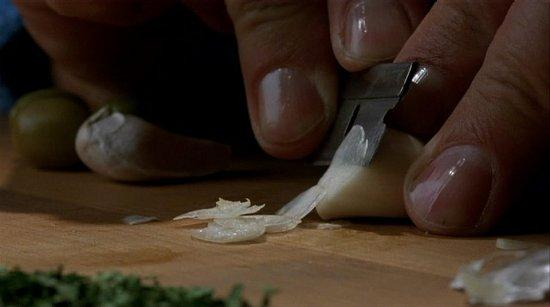

In [159]:
url = "https://guion2.weebly.com/uploads/1/5/0/9/15091428/2195407_orig.jpg"
response = requests.get(url)
pil_image = Image.open(BytesIO(response.content))

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [150]:
prompt = """
You are an expert in cinematic visual analysis. Carefully examine the provided image and identify the type of cinematographic shot being used. Classify the shot into one of the following standard categories, based on the provided descriptions.

Standard Cinematographic Shot Types:

- Extreme Close-Up: Frames a very small part of the subject, such as the eyes, lips, or a specific object detail, filling the entire frame.

- Close-Up: Frames the subject’s face from just below the chin to the top of the head, occupying most of the frame.

- Medium Close-Up: Frames the subject from the shoulders or chest up.

- Medium Shot: Frames the subject from the waist up.

- Medium Long Shot: Frames the subject from mid-thigh or knees up.

- Long Shot: Frames the subject’s entire body from head to toe, with space above and below the subject.

- Extreme Long Shot: Frames the subject or scene from a great distance, showing the subject very small or the environment in full.

- Two-Shot: Frames two subjects within the same shot, either from the waist up or showing their full bodies.

Respond only with the exact name of the shot type from the list above.
"""


In [146]:
?ChatOllama

Init signature:
ChatOllama(
    *args: Any,
    name: Optional[str] = None,
    cache: Union[langchain_core.caches.BaseCache, bool, NoneType] = None,
    verbose: bool = <factory>,
    callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None,
    tags: Optional[list[str]] = None,
    metadata: Optional[dict[str, Any]] = None,
    custom_get_token_ids: Optional[Callable[[str], list[int]]] = None,
    callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None,
    rate_limiter: Optional[langchain_core.rate_limiters.BaseRateLimiter] = None,
    disable_streaming: Union[bool, Literal['tool_calling']] = False,
    model: str,
    mirostat: Optional[int] = None,
    mirostat_eta: Optional[float] = None,
    mirostat_tau: Optional[float] = None,
    num_ctx: Optional[int] = None,
    num_gpu: Optional[int] = None,
    num_thread: Optional[int] = None,
    num_predict: Optional[int] =

In [155]:
llm = ChatOllama(model="llava-llama3:8b-v1.1-fp16", temperature=0, cache=False, num_gpu=1)

In [160]:
def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [
        #SystemMessage(content=prompt),
        HumanMessage(content=content_parts)
    ]


chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {
        "text": prompt,
        "image": image_b64
    }
)

print(query_chain)

Close-up
